In [1]:
# 🔧 Configurar entorno para ejecutar el proyecto en Google Colab

import os
import sys

# Paso 1: Clonar repositorio si no existe
REPO_PATH = "/content/DeepNeuralNetworkUSS"
if not os.path.exists(REPO_PATH):
    !git clone https://github.com/solivare/DeepNeuralNetworkUSS.git

# Paso 2: Definir ruta base del proyecto
BASE_PATH = os.path.join(REPO_PATH, "Examples", "ChurnNN")
SRC_PATH = os.path.join(BASE_PATH, "src")

# Paso 3: Instalar dependencias
REQ_PATH = os.path.join(BASE_PATH, "requirements.txt")
if os.path.exists(REQ_PATH):
    !pip install -q -r {REQ_PATH}
else:
    print("⚠️ requirements.txt no encontrado")

# Paso 4: Agregar src al path
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

print("✅ Entorno configurado.")


Cloning into 'DeepNeuralNetworkUSS'...
remote: Enumerating objects: 1055, done.
remote: Counting objects: 100% (1055/1055), done.
remote: Compressing objects: 100% (982/982), done.
remote: Total 1055 (delta 51), reused 1050 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (1055/1055), 9.15 MiB | 5.98 MiB/s, done.
Resolving deltas: 100% (51/51), done.
✅ Entorno configurado.


In [2]:
# 📦 Importar librerías y cargar dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
data_path = os.path.join(BASE_PATH, "data", "churn_dataset.csv")
df = pd.read_csv(data_path)
df.head()


,compras,llamadas_soporte,dias_inactivo,tiempo_suscrito,churn
0,4,0,27,1,1
1,1,2,25,13,1
2,3,1,18,6,1
3,3,2,23,17,1
4,2,3,18,12,1


In [3]:
# 🔍 Separar variables y escalar

X = df.drop("churn", axis=1)
y = df["churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [4]:
# 🧠 Construir modelo desde configuración

import yaml
from model import build_model
from utils import plot_metrics, show_confusion_matrix

# Cargar configuración
config_path = os.path.join(SRC_PATH, "config.yaml")
with open(config_path) as f:
    config = yaml.safe_load(f)

model = build_model(config)


In [5]:
# 🚂 Entrenar modelo

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=config['training']['epochs'],
    batch_size=config['training']['batch_size']
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5896 - loss: 0.6175 - val_accuracy: 0.6750 - val_loss: 0.5779
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6758 - loss: 0.5571 - val_accuracy: 0.7188 - val_loss: 0.5417
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6534 - loss: 0.5332 - val_accuracy: 0.7250 - val_loss: 0.5131
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6809 - loss: 0.5031 - val_accuracy: 0.7500 - val_loss: 0.4877
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6825 - loss: 0.4854 - val_accuracy: 0.7500 - val_loss: 0.4667
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6982 - loss: 0.4744 - val_accuracy: 0.7625 - val_loss: 0.4483
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7513 - loss: 0.4591 - val_accuracy: 0.7812 - val_loss: 0.4327
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7736 - loss: 0.4412 - val_accuracy: 0.8000 - val_loss

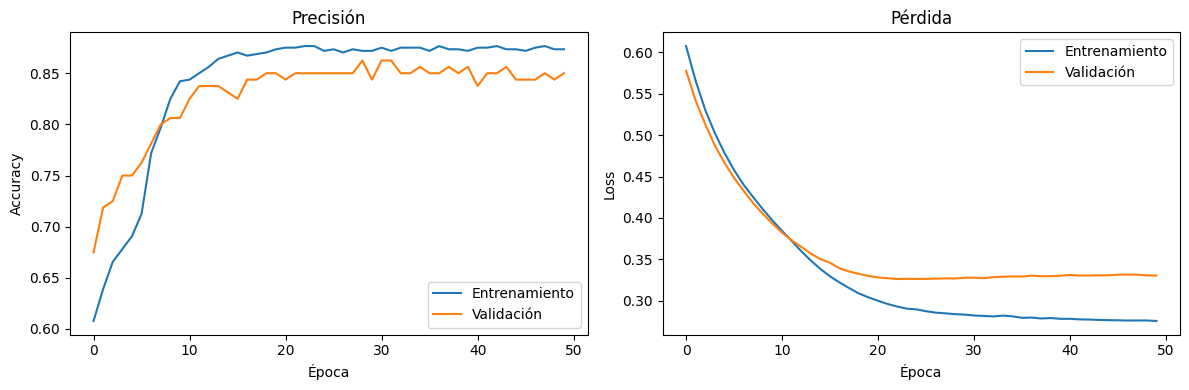

In [6]:
# 📉 Visualización del entrenamiento

plot_metrics(history)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


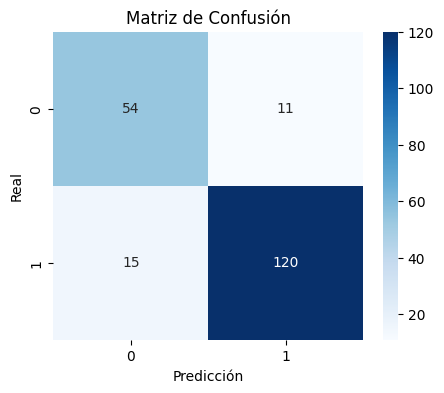

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        65
           1       0.92      0.89      0.90       135

    accuracy                           0.87       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.87      0.87      0.87       200



In [7]:
# 🧪 Evaluar modelo

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
show_confusion_matrix(y_test, y_pred_classes)
